# Mouse click event to draw the line

The code in this notebook performs the task of **taking a video file as input, capturing its first frame** and **drawing line on the frame**. 

In [1]:
# Run these if OpenCV doesn't load

import sys
# sys.path.append('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cv2/')

First, we import the necessary libraries

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

Next, we define variables that will be used through the duration of the code. Defining points (x1,y1) and (x2,y2) by clicking and dragging mouse on the video. 
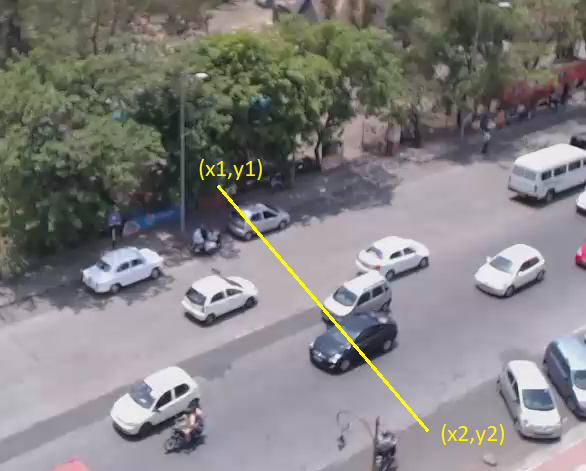

In [3]:
# This variable is created so that we can print necessary values while debugging.
# Creating this variable is good general practice.
SHOW_DEBUG_STEPS = False

# This is a boolean variable which decides if a line has been dragged across or not
drag = 0

# This decides if a point has been selected or not
select_flag = 0

# These two points will be the endpoints of the line that we draw
x1=0
y1=0
x2=1
y2=1
point1 = [x1,y1]
point2 = [x2,y2]

# This is a matrix version of the same two points, point 1 and point 2
crossingLine = np.zeros((2,2),np.int)
crossingLine[0] = point1
crossingLine[1] = point2

# This is a boolean variable which determines if the frame is the first frame or not
blnfFrame = True

# Frame count is initialised (This is not initialised to 1 - we throw away the first frame after we draw a line on it)
frameCnt = 2

# This is a variable that's evoked when we are drawing the line on the frame
callback = False

# The count of vehicles is initialised to 0
vehicleCount = 0

# This is the title of the window where the video will play
src_window='Vehicle Counting - Blob Save'

# This is a variable that keeps track of how many blobs have been cropped
u=0

# Here, we define some colours
SCALAR_BLACK = (0.0,0.0,0.0)
SCALAR_WHITE = (255.0,255.0,255.0)
SCALAR_YELLOW = (0.0,255.0,255.0)
SCALAR_GREEN = (0.0,255.0,0.0)
SCALAR_RED = (0.0,0.0,255.0)
SCALAR_CYAN = (255.0,255.0,0.0)

Some useful functions

In [4]:
# This function closes all the windows that are open with either video or images in them

def closeAll():
    cap.release()
    cv2.destroyAllWindows()
    

# This functions checks if the video is corrupted
    
def retn(ret):
    if not ret == True:
        print("Error reading frame")
        closeAll()

# This functions checks if the first frame is missing        
        
def frm(frame):
    if fFrame is None:
        print("Error reading frame")
        closeAll()
        
# This function is used to draw the yellow line on the first frame.
# This yellow line acts as the boundary - if vehicles cross this line, they are counted as a blob
        
def drawMyLine(frame):
    global point1
    global point2
    global SCALAR_YELLOW
    cv2.line(frame,(point1[0],point1[1]),(point2[0],point2[1]),SCALAR_YELLOW,2,8)



**Steps to draw line in a frame:**
1. Press the left mouse/touchpad in the frame. 
2. Once you have press the left mouse, now drag the mouse pointer to draw the line. 
3. Release the mouse

In [5]:
# This mouse performs the actual drawing of the line

def myMouseHandler(event,x,y,flags,param): # Click left button to start RoI selection
    global point1
    global point2
    global drag            # variable to check when you are dragging the mouse to draw the line
    global select_flag     # varibale to check if you have drawn the line
    global callback        # Return to the main function when you have drawn the line
    
    # Press the left mouse/touchpad in the frame. Store the first point (x1,y1)
    # cv2.EVENT_LBUTTONDOWN is clicking the left mouse/touchpad. 
    if (event == cv2.EVENT_LBUTTONDOWN and not(drag) and not(select_flag)):
        point1 = [x,y]
        # Now since you have pressed the mouse, you will drag the mouse. So making drag = 1
        drag = 1  
    
    # Once you have press the left mouse, now drag the mouse pointer to draw the line. 
    # every time you move the mouse, cv2.EVENT_MOUSEMOVE = 1. 
    if (event == cv2.EVENT_MOUSEMOVE and drag and not(select_flag)): # Drag mouse to select RoI
        img1 = fFrame.copy()
        print ('img1 height' + str(img1.shape[0]))
        print ('img1 width' + str(img1.shape[1]))
        point2 = [x,y]
        drawMyLine(img1)
        cv2.imshow('image',img1) # why img1?
        
    # Once you have drawn the line, release the mouse. Store the last point2 when releasing the mouse and draw the line
    # cv2.EVENT_LBUTTONUP is releasing the mouse
    if(event == cv2.EVENT_LBUTTONUP and drag and not(select_flag)): # Complete selection
        # Making a copy of frame, just to show the line
        img2 = fFrame.copy()
        print ('img2 height' + str(img2.shape[0]))
        print ('img2 width' + str(img2.shape[1]))
        point2 = [x,y]
        drag = 0
        # Make select_flag = 1 as the you have drawn the line
        select_flag = 1
        drawMyLine(img2)
        cv2.imshow('image output',img2) 
        # Return to the main function when you have drawn the line
        callback = 1



Capturing the first frame and calling the *myMouseHandler()* function. **Press escape button to close the window**. 

In [6]:
#main
cap = cv2.VideoCapture('./AundhBridge.mp4')
#cap = cv2.VideoCapture('/media/anand/STB_Data/Projects/ext_projects/Upgrad/Univ_bridge_from_pride.mp4')


if not(cap.isOpened()):
    print("Error reading file")

# Capturing the first frame only    
ret, fFrame  = cap.read()
retn(ret)
frm(fFrame)

# Converting image to gray
fGray = cv2.cvtColor(fFrame, cv2.COLOR_BGR2GRAY)
# cv2.imshow(src_window, fFrame)

cv2.namedWindow('image')

# This function monitors the movement of the mouse
cv2.setMouseCallback('image',myMouseHandler)
#cv2.setMouseCallback(src_window,myMouseHandler)

chChkEscKey = 0  
k = 27    
blnFirstFrame = True
frameCnt = 2
while(1):
    cv2.imshow('image',fGray)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 height720
img1 width1280
img1 heigh